# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [15]:
### All code
# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Dropout(0.25))
# cnn.add(tf.keras.layers.Flatten())
# cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
# cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
# #Output Layer
# cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Model Training

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=3)

Epoch 1/3
2197/2197 [==============================] - 2817s 1s/step - loss: 1.3310 - accuracy: 0.6060 - val_loss: 0.5125 - val_accuracy: 0.8370
Epoch 2/3
2197/2197 [==============================] - 2996s 1s/step - loss: 0.4575 - accuracy: 0.8555 - val_loss: 0.2858 - val_accuracy: 0.9083
Epoch 3/3
2197/2197 [==============================] - 3182s 1s/step - loss: 0.2700 - accuracy: 0.9140 - val_loss: 0.1998 - val_accuracy: 0.9322


# Using Resnet

In [19]:
# import tensorflow
# from tensorflow import keras
# from keras.models import Sequential,load_model,Model
# from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
# from keras.optimizers import SGD
# from keras.initializers import glorot_uniform
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications.resnet50 import preprocess_input

In [20]:
# base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)

In [21]:
# #Model building
# base_model_tf.trainable=False

# pt=Input(shape=(224,224,3))
# func=tensorflow.cast(pt,tensorflow.float32)
# x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
# model_resnet=base_model_tf(x,training=False)
# model_resnet=GlobalAveragePooling2D()(model_resnet)
# model_resnet=Dense(128,activation='relu')(model_resnet)
# model_resnet=Dense(64,activation='relu')(model_resnet)
# model_resnet=Dense(38,activation='softmax')(model_resnet)


# model_main=Model(inputs=pt,outputs=model_resnet)
# model_main.summary()

# Model training using ResNet

In [22]:
# train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
#                                   ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

# val_datagen=ImageDataGenerator()

# path_train='train'

# path_valid='valid'

# train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
#                                          color_mode='rgb',class_mode='categorical',seed=42)

# valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

In [23]:
# es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
# mc=ModelCheckpoint(filepath='./',monitor='val_accuracy',verbose=1,save_best_only=True)
# lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [24]:
# model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# model_main.fit(
#     train,
#     validation_data=valid,
#     epochs=5,
#     steps_per_epoch=200,
#     verbose=1,
#     callbacks=[mc,es,lr])

## Evaluating Model

In [27]:
#Training set Accuracy
# train_loss, train_acc = model_main.evaluate(training_set)
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 461s 210ms/step - loss: 0.1281 - accuracy: 0.9589
Training accuracy: 0.9589017629623413


In [28]:
#Validation set Accuracy
# val_loss, val_acc = model_main.evaluate(validation_set)
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 113s 205ms/step - loss: 0.1998 - accuracy: 0.9322
Validation accuracy: 0.9321647882461548


### Saving Model

In [29]:
# model_main.save('trained_plant_disease_model.h5')
cnn.save('trained_plant_disease_model.h5')

C:\Users\arnab\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
training_history.history #Return Dictionary of history

{'loss': [1.3309993743896484, 0.4574788212776184, 0.2700447738170624],
 'accuracy': [0.6059890389442444, 0.8555089235305786, 0.913976788520813],
 'val_loss': [0.5124702453613281, 0.2858486473560333, 0.19983389973640442],
 'val_accuracy': [0.8370134234428406, 0.9083200693130493, 0.9321647882461548]}

In [31]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [32]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

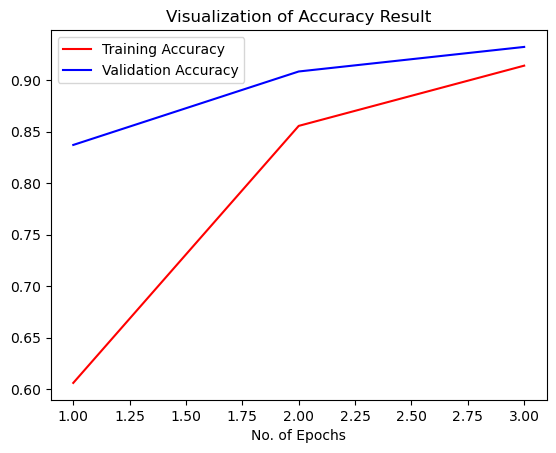

In [33]:
epochs = [i for i in range(1,4)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [34]:
class_name = validation_set.class_names

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 221s 13ms/step


In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [38]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.83      0.95      0.89       504
                                 Apple___Black_rot       0.97      0.96      0.96       497
                          Apple___Cedar_apple_rust       0.94      0.96      0.95       440
                                   Apple___healthy       0.96      0.82      0.89       502
                               Blueberry___healthy       0.91      0.99      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.96      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.91      0.88       410
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.91      0.

### Confusion Matrix Visualization

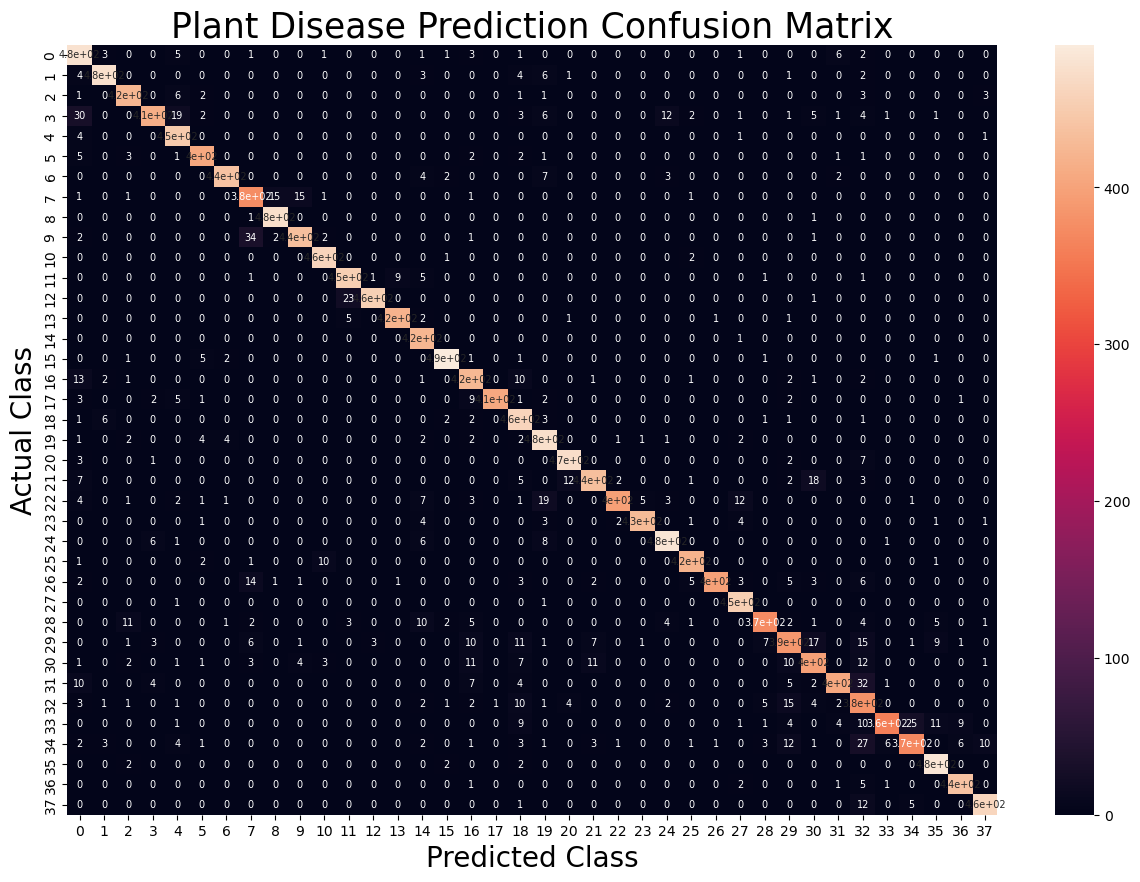

In [45]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 7})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()